<a href="https://colab.research.google.com/github/Hiteshkumar231801059/AD23532_PODS/blob/main/ex-6(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
df = pd.read_csv("airline-passengers.csv", parse_dates=['Month'], index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


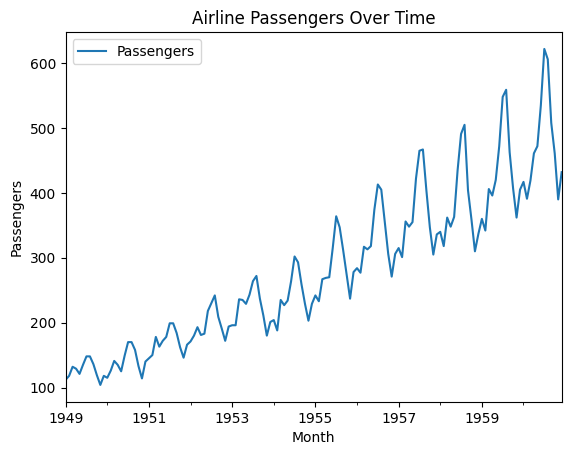

In [17]:
df.plot(title='Airline Passengers Over Time')
plt.ylabel('Passengers')
plt.show()

In [29]:
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [30]:
d = 0
series = df['Passengers']
if result[1] > 0.05:
    d += 1
    series = series.diff().dropna()

Differenced ADF Statistic: -2.8292668241700047
Differenced p-value: 0.05421329028382478


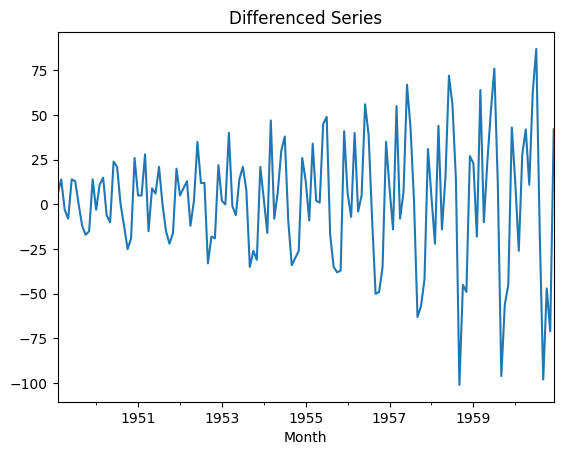

In [31]:
result_diff = adfuller(series)
print('Differenced ADF Statistic:', result_diff[0])
print('Differenced p-value:', result_diff[1])

series.plot(title='Differenced Series')
plt.show()

Second Differenced ADF Statistic: -16.384231542468513
Second Differenced p-value: 2.7328918500142026e-29


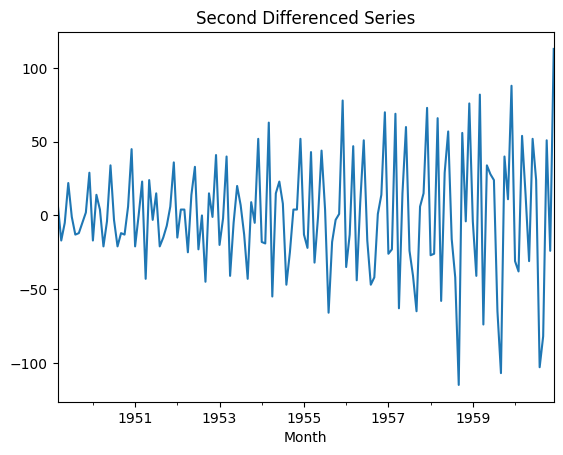

In [32]:
if result_diff[1] > 0.05:
    d += 1
    series = series.diff().dropna()
    result_diff2 = adfuller(series)
    print('Second Differenced ADF Statistic:', result_diff2[0])
    print('Second Differenced p-value:', result_diff2[1])
    series.plot(title='Second Differenced Series')
    plt.show()

In [33]:
train_size = int(len(df) * 0.8)
train, test = df['Passengers'][:train_size], df['Passengers'][train_size:]

In [34]:
model = ARIMA(train, order=(5, d, 0))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
forecast = model_fit.forecast(steps=len(test))

In [37]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

MSE: 469187.4575741138
MAE: 618.6166551413303
RMSE: 684.972596221275


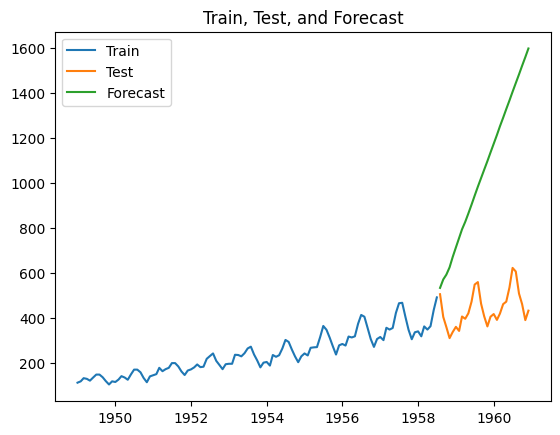

In [38]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('Train, Test, and Forecast')
plt.show()